# **Week 14: Brownian Motion**


<br>

In this exercise, we make use of a 2D system composed of two types of particles, to implement an algorithm to simulate Brownian motion and explore physical quantities such as the mean square displacement (MSD) and diffusion coefficients.

<br>


> ### **Introduction: Brownian Motion**


<br>


Brownian motion is a stochastic process where particles undergo random motion. This phenomenon can be modelled by updating the particle's position using random displacements sampled from a normal distribution. Additionally, the step size can be adjusted based on temperature and mass effects.


The position $\mathbf{r_{i}}(t)\ $ of a particle at time $ t $ and coordinate $ i $ in a simulation can be updated as follows:

$$ \mathbf{r_{i}}(t + \Delta t) = \mathbf{r_{i}}(t) + \sqrt{\frac{2kT}{m}} \Delta t\cdot \mathbf{\xi} \tag{Equation 1.} $$

Here:
- $k$ is the Boltzmann constant.
- $T$ is the temperature.
- $\Delta t$ is the time step.
- $m$ is the mass of the particle.
- $\mathbf{\xi}$ is a vector of random displacements sampled from a normal distribution with zero mean and specified variance.


<br>


> ### **Introduction: Mean Square Displacement**


The mean square displacement (MSD) is a measure of how much particles in a system move on average over time and is defined as the average squared distance travelled by a particle from its initial position. Mathematically, it is expressed as:

$$ MSD(t) = \langle |\mathbf{r}(t) - \mathbf{r}_0|^2 \rangle \tag{Equation 2.} $$

Where:

- $ MSD(t) $: Mean Square Displacement at time $ t $.
- $ \langle \cdot \rangle $: Ensemble average, representing an average over all particles in the system.
- $ \mathbf{r}(t) $: Position vector of a particle at time $ t $.
- $ \mathbf{r}_0 $: Initial position vector of the particle.

<br>


> ### **Introduction: Diffusion Coefficient**


The diffusion coefficient $D$ characterizes the rate of random motion of particles in a system. In two-dimensional (2D) systems, the relationship between the mean square displacement (MSD) and the diffusion coefficient is given by:

$$ MSD(t) = 4Dt \tag{Equation 3.} $$

Where:

- $ MSD(t) $: Mean Square Displacement at time $t$.
- $ D $: Diffusion Coefficient.
- $ t $: Time.

The diffusion coefficient can be obtained from the MSD through linear fitting of simulated data onto the equation.

# **Task 1**


The first task is to define the `ParticleType` class, the function `simulate_random_walk`, run the Brownian motion model and generate two plots.

1. **Define the class `ParticleType`**:
    - Define the constructor function `__init__`:
        - This function must take the input `mass` and set it as an attribute `self.mass`.
</br>


2. **Define the function `simulate_random_walk`**:
    - This function must take the inputs `total_time` (the total time of the simulation), `dt` (the time step of the simulation), `num_particles` (the number of particles of each type), `particle_types` (List of `ParticleType` objects representing different types of particles) and `temperature`.
    - This function must return `trajectories`, a 4D NumPy array representing the trajectories of all the  particles.
    - This function will initialise the particles in the following way:
        - The particles of type A will all be initialised ($ \mathbf{r}_0 $) at position (0, 0) in XY coordinates.
        - The particles of type B will all be initialised ($ \mathbf{r}_0 $) at position (1E-9, 1E-9) in XY coordinates.

    - This function will perform the simulation of our model for the given number of steps, by following these steps iteratively.
        - Every time step, iterate through all the particles and for each particle:
            - Determine the length of the step to be taken in the X and Y coordinates, by sampling the from a normal distribution with a standard deviation of 1E-9.
            - Calculate the scaling factor for mass and temperature effects: $ \sqrt{\frac{2kT}{m}}$.
            - Adjust the sampled length of the step to be taken in each coordinate by these scaling factors.
            - Update the position of the particle according to equation 1.
</br>

3. **Simulate the model and generate two plots`**:
    - Initialize the two types of particles with their respective masses and create the list to be used as the input `particle_types`.
    - Run the model using specified parameters below to obtain the trajectories of the particles.
    - Plot the positions of all particles at the beginning and end of the simulation in two separate plots (colour code it so you can visually differentiate particles of each type).
    - As usual label your plots accordingly.

<br>

> Note: For this exercise, use `total_time` = 100E-12 seconds, `dt` = 1E-15 seconds, `num_particles` = 100, `temperature` = 300.0 K, mass of particle A = 1E-24 kg, and mass of particle B = 2E-24 kg. Furthermore, the number of particles is the same for both types of particles.


      


In [127]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [128]:
class ParticleType:
    def __init__(self, mass):
        self.mass = mass

In [129]:
def simulate_random_walk(total_time, dt, num_particles, particle_types, temperature):
    num_types = len(particle_types)
    num_steps = int(total_time / dt)
    std_dev = 1e-9

    trajectories = np.zeros((num_types, num_particles, num_steps, 2))

    for particle_type_idx, particle_type in enumerate(particle_types):
        for particle_idx in range(num_particles):
            r_0 = np.array([0.0, 0.0]) if particle_type == "A" else np.array([1e-9, 1e-9])
            for step in range(num_steps):
                step_x = np.random.normal(loc=0, scale=std_dev)
                step_y = np.random.normal(loc=0, scale=std_dev)
                factor = np.sqrt(2 * scipy.constants.k * temperature / particle_types[particle_type_idx].mass)
                adjusted_step_x = factor * step_x
                adjusted_step_y = factor * step_y
                r = r_0 + np.array([adjusted_step_x, adjusted_step_y])
                trajectories[particle_type_idx, particle_idx, step, :] = r
    return trajectories

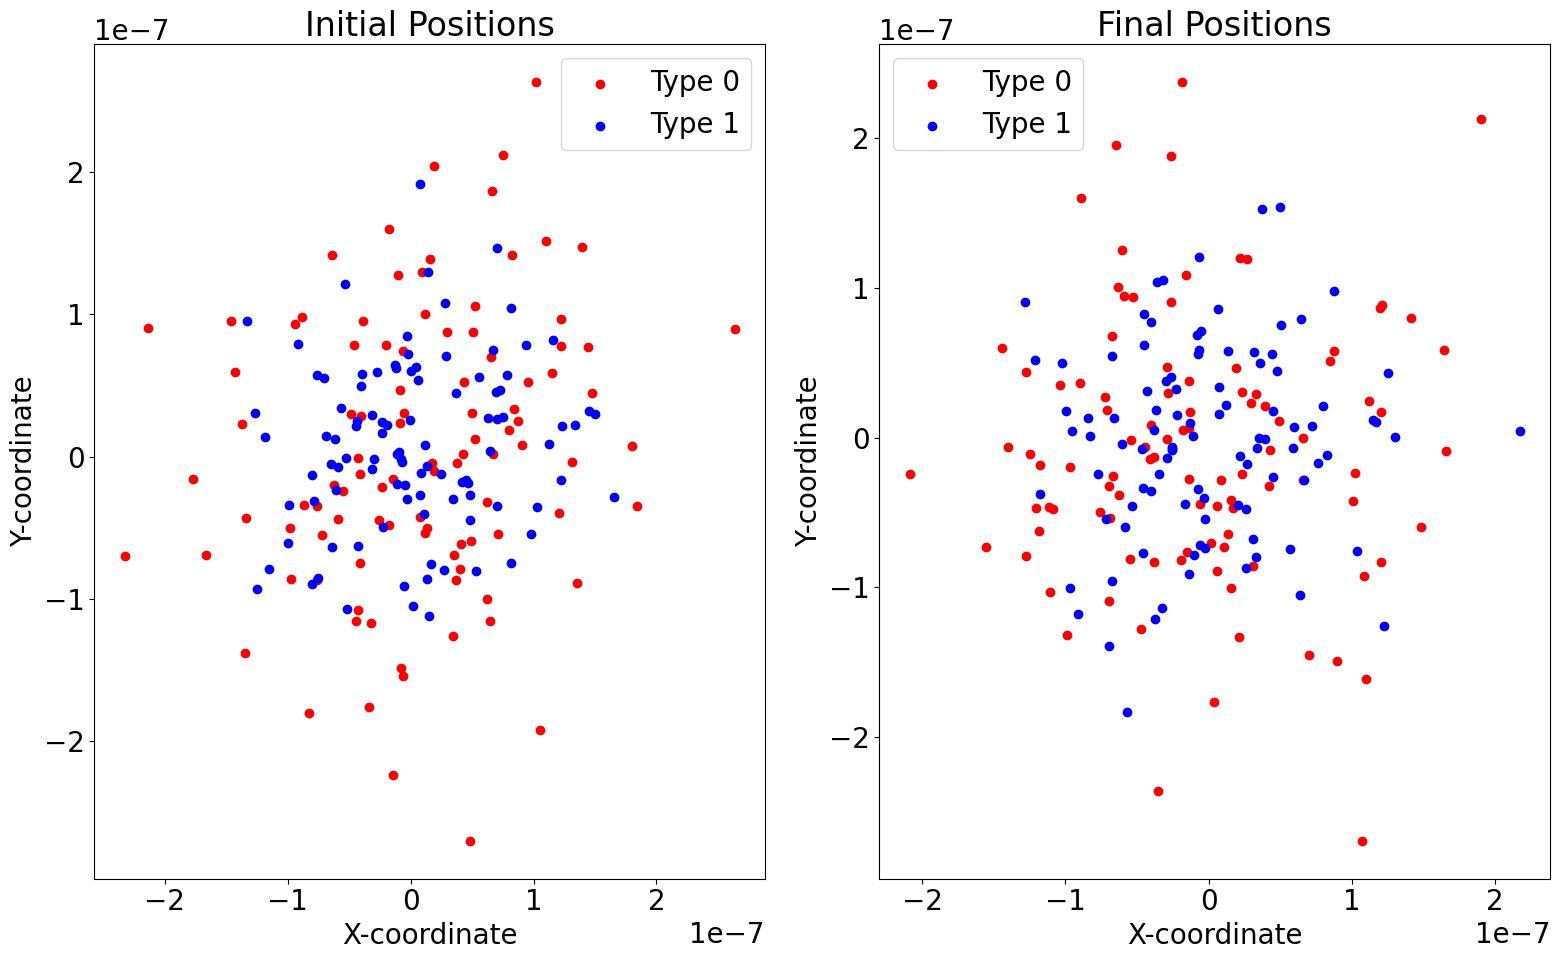

In [130]:
total_time = 100E-12
dt = 1E-15
num_particles = 100
temperature = 300.0
mass_A = 1E-24
mass_B = 2E-24

particle_type_A = ParticleType(mass_A)
particle_type_B = ParticleType(mass_B)
particle_types = [particle_type_A, particle_type_B]

trajectories = simulate_random_walk(total_time, dt, num_particles, particle_types, temperature)

# Plot the positions at the beginning and end of the simulation
fig, axes = plt.subplots(1, 2, tight_layout=True, figsize=(16, 10))
font_params = {
    'font.family': 'sans-serif',
    'font.serif': 'Helvetica',
    'font.size': 20,
    'font.weight': 'normal',
}
plt.rcParams.update(font_params)

# Initial positions
for particle_type_idx, particle_type in enumerate(particle_types):
    for particle_idx in range(num_particles):
        initial_position = trajectories[particle_type_idx, particle_idx, 0, :]
        axes[0].scatter(initial_position[0], initial_position[1], 
                        color="red" if particle_type_idx == 0 else "blue",
                        label = f'Type {particle_type_idx}' if particle_idx == 0 else "")

axes[0].set_title("Initial Positions")
axes[0].set_xlabel("X-coordinate")
axes[0].set_ylabel("Y-coordinate")
axes[0].legend()

# Final positions
for particle_type_idx, particle_type in enumerate(particle_types):
    for particle_idx in range(num_particles):
        final_position = trajectories[particle_type_idx, particle_idx, -1, :]
        axes[1].scatter(final_position[0], final_position[1], 
                        color = "red" if particle_type_idx == 0 else "blue", 
                        label = f'Type {particle_type_idx}' if particle_idx == 0 else "")

axes[1].set_title("Final Positions")
axes[1].set_xlabel("X-coordinate")
axes[1].set_ylabel("Y-coordinate")
axes[1].legend()

# **Task 2**


The second task is to define the function `calculate_mean_square_displacement`, and generate one plot.



1. **Define the function `calculate_mean_square_displacement`**:
    - This function must take the inputs `trajectories` (trajectories of particles obtained from the simulate_random_walk function).
    - This function must return `msd` (mean square displacement of each particle type, throughout the simulation)

</br>

3. **Generate one plot**:
    - Plot the mean square displacement of each particle type, throughout the simulation.
    - As usual label your plots accordingly.

<br>

In [131]:
def calculate_mean_square_displacement(trajectories):
    num_types, num_particles, num_steps, _ = trajectories.shape
    msd = np.zeros((num_types, num_steps))
    for particle_type_idx in range(num_types):
        for step in range(num_steps):
            positions = trajectories[particle_type_idx, :, step, :]
            initial_positions = trajectories[particle_type_idx, :, 0, :]
            displacement = np.sum((positions - initial_positions)**2, axis=1)
            mean_displacement = np.mean(displacement)
            msd[particle_type_idx, step] = mean_displacement

    return msd

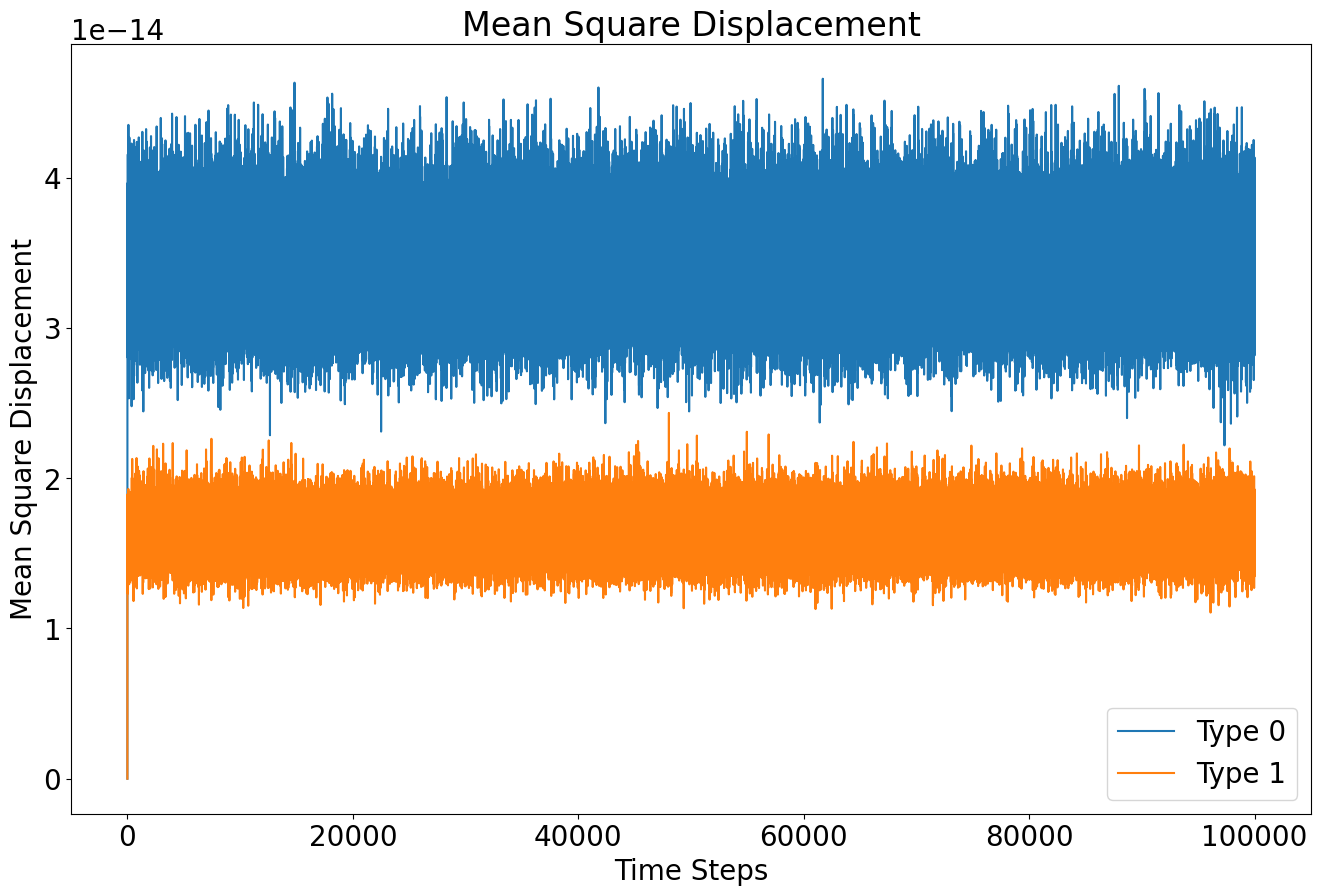

In [132]:
# Mean square displacement
msd = calculate_mean_square_displacement(trajectories)

plt.figure(figsize=(16, 10))
for particle_type_idx, particle_type in enumerate(["Type 0", "Type 1"]):
    plt.plot(msd[particle_type_idx], label=particle_type)

plt.title("Mean Square Displacement")
plt.xlabel("Time Steps")
plt.ylabel("Mean Square Displacement")
plt.legend()

# **Task 3**


The third task is to define the function `extract_diffusion_coefficient` and extract the diffusion coefficients for each particle type.



1. **Define the function `extract_diffusion_coefficient`**:
    - This function must take the inputs `time_values` (array of time values) and `msd_values` (array of corresponding mean square displacement values at each time in `time_values`, obtained in task 2).
    - This function must return the `diffusion_coefficient obtained from the data.
    - This function must perform a linear fit of the provided data to equation 3.
        - Define the auxiliary function `linear_fit`  which defines the analytical function (from equation 3). to which the data must be fitted.
    - Fit the data to the analytical equation (hint: from scipy.optimize import curve_fit)

</br>

2. **Obtain the diffusion coefficients for each particle type`**:
    - Use the `extract_diffusion_coefficient` to calculate the diffusion coefficient for both particle types.
    - Print the diffusion coefficient for each particle type.

In [138]:
from scipy.optimize import curve_fit

def extract_diffusion_coefficient(time_values, msd_values):
    popt, pcov = curve_fit(lambda t, D: 2 * D * t, time_values, msd_values)
    diffusion_coefficient = popt[0] / 4
    return diffusion_coefficient

time_values = np.arange(0, total_time, dt)
msd_values_type_A = msd[0, :]
msd_values_type_B = msd[1, :]

diffusion_coefficient_type_A = extract_diffusion_coefficient(time_values, msd_values_type_A)
diffusion_coefficient_type_B = extract_diffusion_coefficient(time_values, msd_values_type_B)
print(f"Diffusion Coefficient for Type A: {diffusion_coefficient_type_A}")
print(f"Diffusion Coefficient for Type B: {diffusion_coefficient_type_B}")

(2, 100000)
Diffusion Coefficient for Type A: 6.416510426051504e-05
Diffusion Coefficient for Type B: 3.071242652508133e-05
